In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data 
#### The data is loaded from https://www.kaggle.com/blastchar/telco-customer-churn 

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan, regex=True) #Replaces empty rows with NaN
df['TotalCharges'] = df['TotalCharges'].astype(str).astype(float) #Converts string object to float

df.isnull().sum() #Gets total number missing rows

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
#Drops the 11 Nan rows
df.dropna(inplace = True) 

#Replace Yes and No with 1 and 0 for the 'Churn' column
df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

#Keeps all columns except the first column (drops customer id)
df2 = df.iloc[:,1:] 

#Converts categorical data to numeric
df2_dummies = pd.get_dummies(df2) 
df2_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


## Correlation Check
Checks for the correlation between all the features to the target variable 'Churn'. The correlation method used for this case is 'Pearson Correlation'.

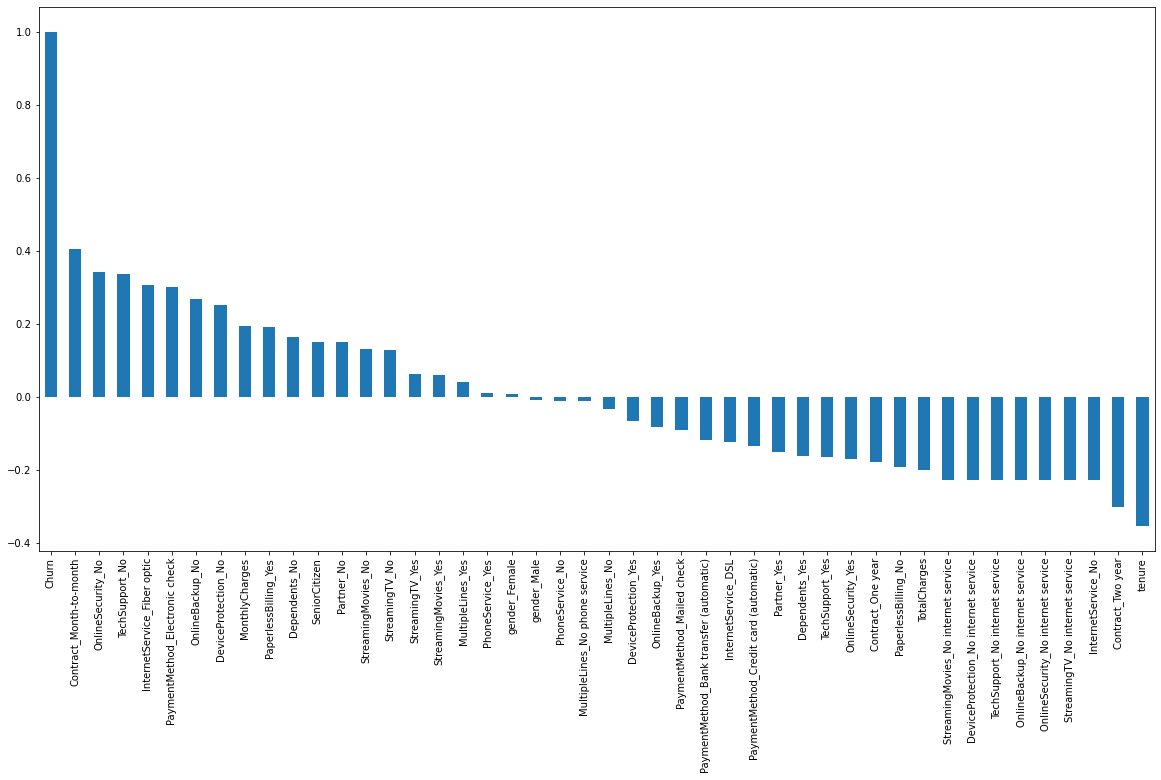

In [6]:
# Correlation Checks
df_corr = df2_dummies.copy()
plt.figure(figsize = (20,10))
correlation = df_corr.corr()['Churn'].sort_values(ascending = False)
correlation.plot(kind = 'bar')


## Exploratory Data Analysis
### The data will be analysis under 3 major categories:
#### 1. Based on Demographics
#### 2. Customer account information
#### 3. Services information 

### Demographics Based Analysis
This section analyzes the data based on the demographics, which can be categorized into the following:
1. Gender
2. Age (Senior Citizen)
3. Relationship (Partner)
4. Relationship (Dependents)


#### Demographic Relationship with Churn

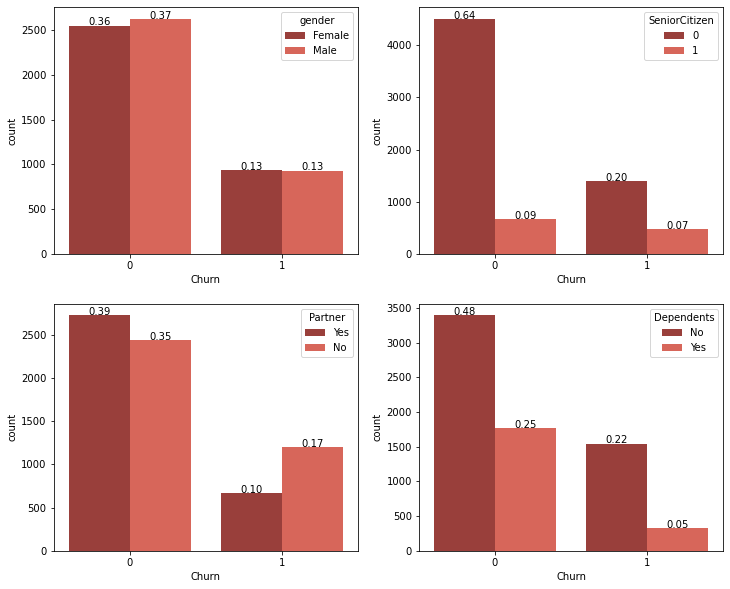

In [32]:
total = float(len(df))
def add_text(total,plot):
    for patch in plot.patches:
        height = patch.get_height()
        plot.text(patch.get_x() + patch.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha = 'center')
        
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

gender_plot = sns.countplot(x = 'Churn', data = df, hue = 'gender', palette = 'Reds_d', ax = axes[0,0])
age_plot = sns.countplot(x = 'Churn', data = df, hue = 'SeniorCitizen', palette = 'Reds_d', ax = axes[0,1])
rel_partner_plot = sns.countplot(x = 'Churn', data = df, hue = 'Partner', palette = 'Reds_d', ax = axes[1,0])
rel_dep_plot = sns.countplot(x = 'Churn', data = df, hue = 'Dependents', palette = 'Reds_d', ax = axes[1,1])

add_text(total, gender_plot)
add_text(total, age_plot)
add_text(total, rel_partner_plot)
add_text(total, rel_dep_plot)



### Customer Account Analysis
This section analyzes the customer account details, which include the following:
1. Contract
2. Payment method 
3. Billing info

#### Customer Account Relationship with Churn

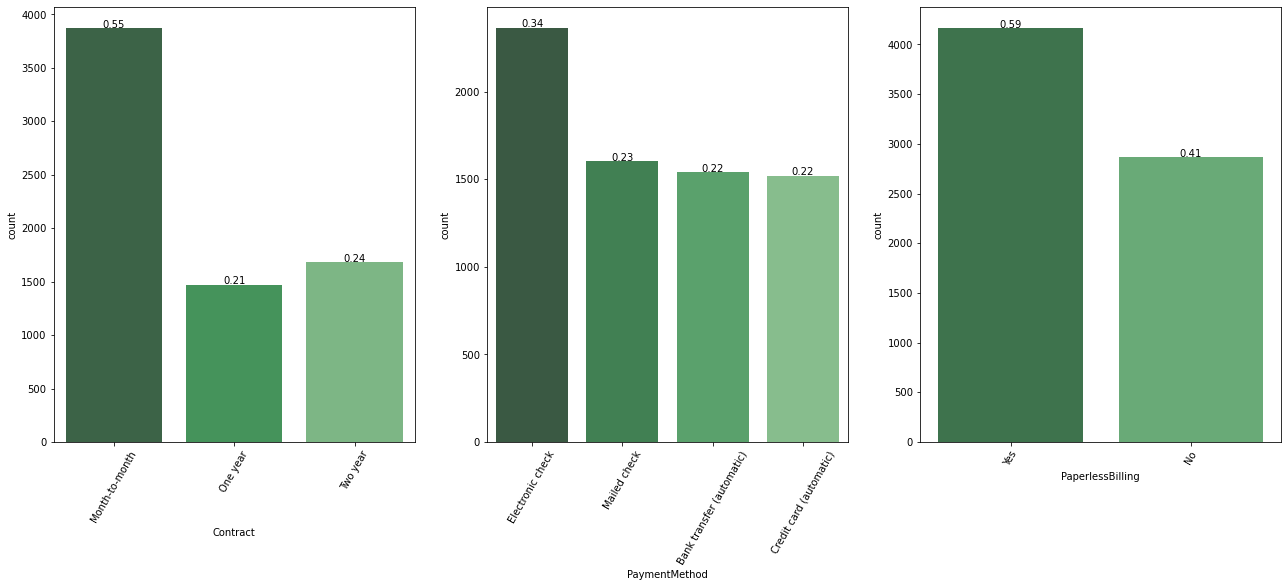

In [50]:
figure, axes = plt.subplots(nrows=1, ncols=3,figsize=(22,8))
contract_plot = sns.countplot(x = 'Contract', data = df, palette = 'Greens_d', ax = axes[0])
contract_plot.set_xticklabels(contract_plot.get_xticklabels(), rotation = 60)

pay_method_plot = sns.countplot(x = 'PaymentMethod', data = df, palette = 'Greens_d', ax = axes[1])
pay_method_plot.set_xticklabels(pay_method_plot.get_xticklabels(), rotation = 60)

bill_plot = sns.countplot(x = 'PaperlessBilling', data = df, palette = 'Greens_d', ax = axes[2])
bill_plot.set_xticklabels(bill_plot.get_xticklabels(), rotation = 60)

add_text(total, contract_plot)
add_text(total, pay_method_plot)
add_text(total, bill_plot)


In [ ]:
### Plot the account type relationship with churn

### Services Analysis 
This section visually represents the all the services offered, namely:
1. Phone Service
2. Multiple Lines
3. Internet Services
4. Online Security
5. Online Backup
6. Device Protection
7. Tech Support
8. Streaming TV
9. Streaming Movies


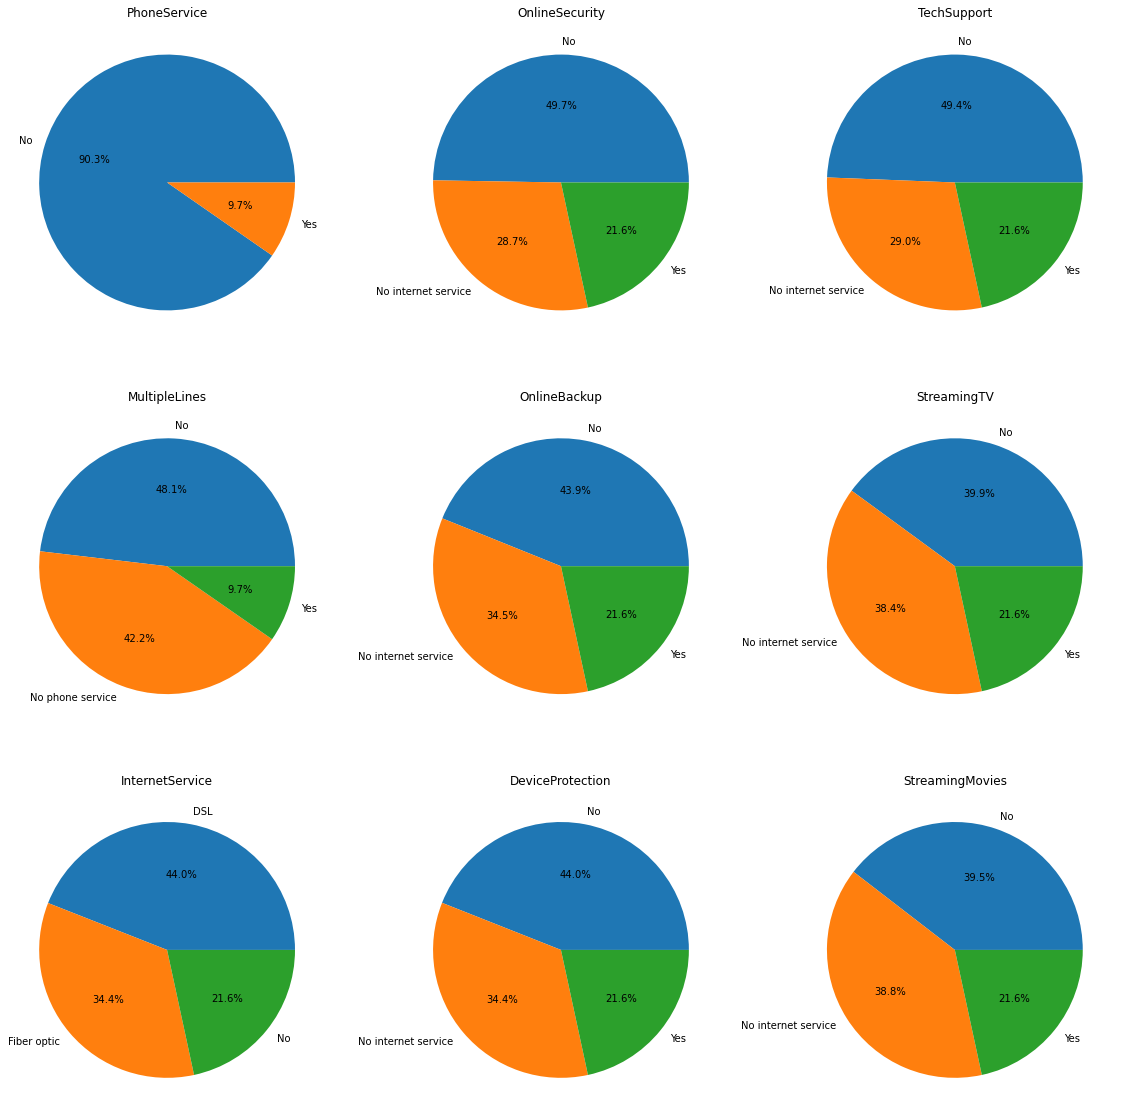

In [107]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, item in enumerate(services):
    if i < 3: 
        ax = axes[i, 0]
        label_type = df.groupby(item).agg('count')
        label = label_type.customerID.index
        ax.pie(df[item].value_counts(), labels = label, autopct = '%1.1f%%')
        ax.set_title(item)
        
    elif i >=3 and i < 6:
        ax2 = axes[i-3, 1]
        label_type = df.groupby(item).agg('count')
        label = label_type.customerID.index
        ax2.pie(df[item].value_counts(), labels = label, autopct = '%1.1f%%')
        ax2.set_title(item)
        
    elif i < 9:
        ax3 = axes[i-6, 2]
        label_type = df.groupby(item).agg('count')
        label = label_type.customerID.index
        ax3.pie(df[item].value_counts(), labels = label, autopct = '%1.1f%%')
        ax3.set_title(item)
        

### This section pertains to selecting the sufficient amount of features

In [8]:
features_df = pd.DataFrame(correlation)
features_df = features_df.rename(columns = {'Churn': 'Churn_Correlation'})
features_df = features_df.loc[(features_df['Churn_Correlation'] > 0.1) | (features_df['Churn_Correlation'] < -0.1)]
features_df

,Churn_Correlation
Churn,1.000000
Contract_Month-to-month,0.404565
OnlineSecurity_No,0.342235
TechSupport_No,0.336877
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
OnlineBackup_No,0.267595
DeviceProtection_No,0.252056
MonthlyCharges,0.192858
PaperlessBilling_Yes,0.191454
